In [3]:
###TRAINING DATA----
path="D:/DS/aclImdb_v1/aclImdb/train/pos"
data=[]
files=[path+'/'+ f for f in os.listdir(path) if os.path.isfile(path+'/'+ f)]
for f in files:
    with open (f,"r",encoding="utf8")as myfile:
        data.append(myfile.read())
df_trainpos=pd.DataFrame(data,columns=['review'])    
df_trainpos['label']="1"
path="D:/DS/aclImdb_v1/aclImdb/train/neg"
data1=[]
files=[path+'/'+ f for f in os.listdir(path) if os.path.isfile(path+'/'+ f)]
for f in files:
    with open (f,"r",encoding="utf8")as myfile:
        data1.append(myfile.read())
df_trainneg=pd.DataFrame({'review':data1})
df_trainneg['label']="0"
df_trainneg.head()
train_df =pd.concat([df_trainneg,df_trainpos],axis=0)

###--------------------------------------------------
###TESTING DATA----
path="D:/DS/aclImdb_v1/aclImdb/test/pos"
data2=[]
files=[path+'/'+ f for f in os.listdir(path) if os.path.isfile(path+'/'+ f)]
for f in files:
    with open (f,"r",encoding="utf8")as myfile:
        data2.append(myfile.read())
df_testpos=pd.DataFrame(data2,columns=['review'])    
df_testpos['label']="1"
path="D:/DS/aclImdb_v1/aclImdb/test/neg"
data3=[]
files=[path+'/'+ f for f in os.listdir(path) if os.path.isfile(path+'/'+ f)]
for f in files:
    with open (f,"r",encoding="utf8")as myfile:
            data3.append(myfile.read())
    df_testneg=pd.DataFrame({'review':data3})
    df_testneg['label']="0"
    test_df =pd.concat([df_testneg,df_testpos],axis=0)

  

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import bs4
from bs4 import BeautifulSoup
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [ ]:
###--------STOP-WORDS REMOVAL
stop_words = set(stopwords.words('english')) 
test_df['review'] = test_df['review'].str.split()
test_df['review']=test_df['review'].apply(lambda x: [word for word in x if word not in stop_words])

train_df['review'] = train_df['review'].str.split()
train_df['review'] =train_df['review'].apply(lambda x: [word for word in x if word not in stop_words])

###-----------
####----Removing punctuations, HTML tags (like br) etc.

def stripTags(x):
        # BeautifulSoup on content
        soup = BeautifulSoup(str(x), "lxml")
        # Stripping all <code> tags with their content if any
        if soup.code:
            soup.code.decompose()
        # Get all the text out of the html
        text =  soup.get_text()
        return text
train_df['review'] = train_df['review'].map(stripTags)
test_df['review'] = test_df['review'].map(stripTags)
#train_df['review']=train_df['review'].apply(lambda x:" ".join([BeautifulSoup(str(word)).getText() for word in x.split()]))
#test_df['review'] = [BeautifulSoup(str(X)).getText() for X in train_df['review']]
def remove_punctuation(x):
    # Removing non ASCII chars
    x = re.sub("[^\x00-\x7f]", " ",str(x))
    x = re.sub("<[^<]+?>", " ",str(x))
    x = re.sub(r'\d+', '', x)
    x = re.sub("'", '', x)
    x = re.sub(r'\W+',' ', x)
    x = x.replace('_', '')
    # Removing (replacing with empty spaces actually) all the punctuations
    return re.sub("["+string.punctuation+"]", " ", x)
#df_testneg['review'] = df_testneg['review'].apply(remove_punctuation)
train_df['review'] = train_df['review'].apply(remove_punctuation)
test_df['review'] = test_df['review'].apply(remove_punctuation)
#print(train_df.head())

#print(train_df.head(50))

In [ ]:
#####-------------------------------------------
from nltk.stem import PorterStemmer
stemmer = PorterStemmer() 
#print(train_df.head())
train_df['review']=train_df['review'].apply(lambda x:" ".join([stemmer.stem(word) for word in x.split()]))
test_df['review']=test_df['review'].apply(lambda x:" ".join([stemmer.stem(word) for word in x.split()]))
#print(train_df.tail(10))
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()
train_df['review']=train_df['review'].apply(lambda x:" ".join([lem.lemmatize(word) for word in x.split()]))
test_df['review']=test_df['review'].apply(lambda x:" ".join([lem.lemmatize(word) for word in x.split()]))


In [ ]:
###-------------the most common words associated with each category


from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(stop_words = 'english', analyzer='word')

df_freq = pd.concat([train_df, test_df], ignore_index = True)



vect_pos = cvector.fit_transform(df_freq[df_freq.label.isin(['1'])].review)


# Visualising the high frequency words for positive set
df_freq_pos = pd.DataFrame(vect_pos.sum(axis=0), columns=list(cvector.get_feature_names()), index = ['frequency']).T

df_freq_pos.nlargest(10, 'frequency')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(stop_words = 'english', analyzer='word')


vect_neg = cvector.fit_transform(df_freq[df_freq.label.isin(['0'])].review)
# Visualising the high frequency words for negative set

#freqs_neg = [(word, sum_words_neg[0, idx]) for word, idx in cvector.vocabulary_.items()]
df_freq_neg = pd.DataFrame(vect_neg.sum(axis=0), columns=list(cvector.get_feature_names()), index = ['frequency']).T
#sorted(freqs_neg, key = lambda x: x[1])
df_freq_neg.nlargest(10, 'frequency')


In [10]:
####UNSUPERVISED without cleaning######
path="D:/DS/aclImdb_v1/aclImdb/train/unsup"
data4=[]
files=[path+'/'+ f for f in os.listdir(path) if os.path.isfile(path+'/'+ f)]
for f in files:
    with open (f,"r",encoding="utf8")as myfile:
        data4.append(myfile.read())
df_unsup=pd.DataFrame(data4,columns=['review'])  

##################################### Using K-means to create the positive and negative clusters ##################################### 
from sklearn.cluster import KMeans
# Vectorizing dataset
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_unsup.review)
 
# Creating a k-means object and fitting it to target variable
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
 
# Visualising the 2 clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 br
 movie
 film
 like
 just
 good
 really
 bad
 story
 time
Cluster 1:
 movie
 film
 br
 like
 just
 good
 really
 time
 story
 great


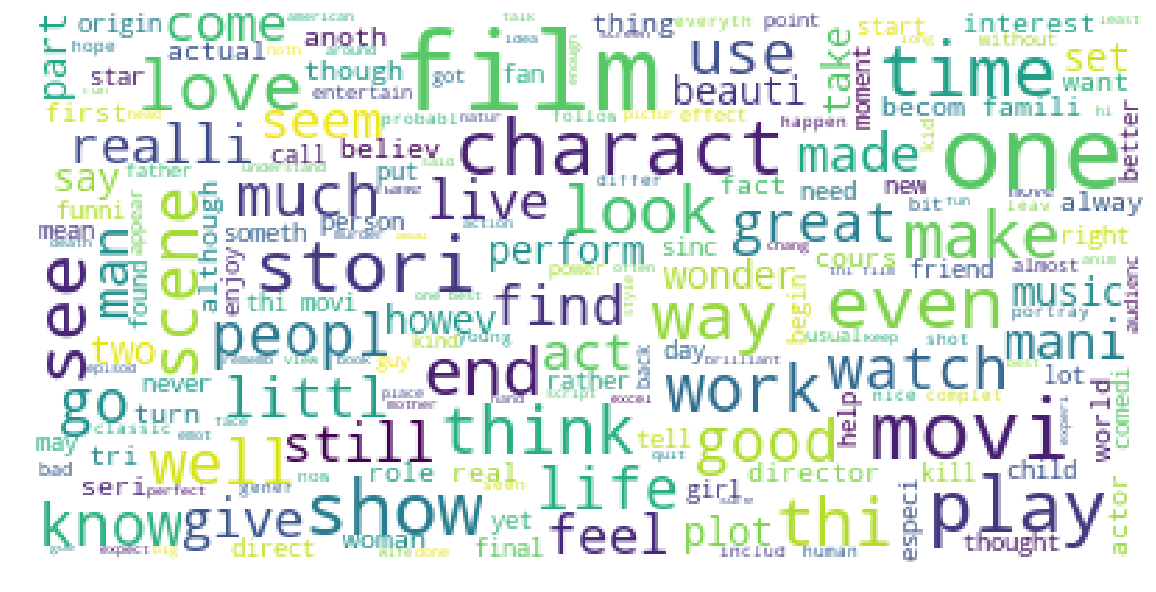

In [33]:
#####Visualization-WordCloud Positive Train & Test set###### 

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df_freq = pd.concat([train_df, test_df], ignore_index = True)
wc_poslist=df_freq["review"][df_freq.label.isin(['1'])].unique().tolist()


Wc_pos =''.join(wc_poslist)

stopwords = set(STOPWORDS)
wordcloud_pos = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(Wc_pos)
    
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.show()

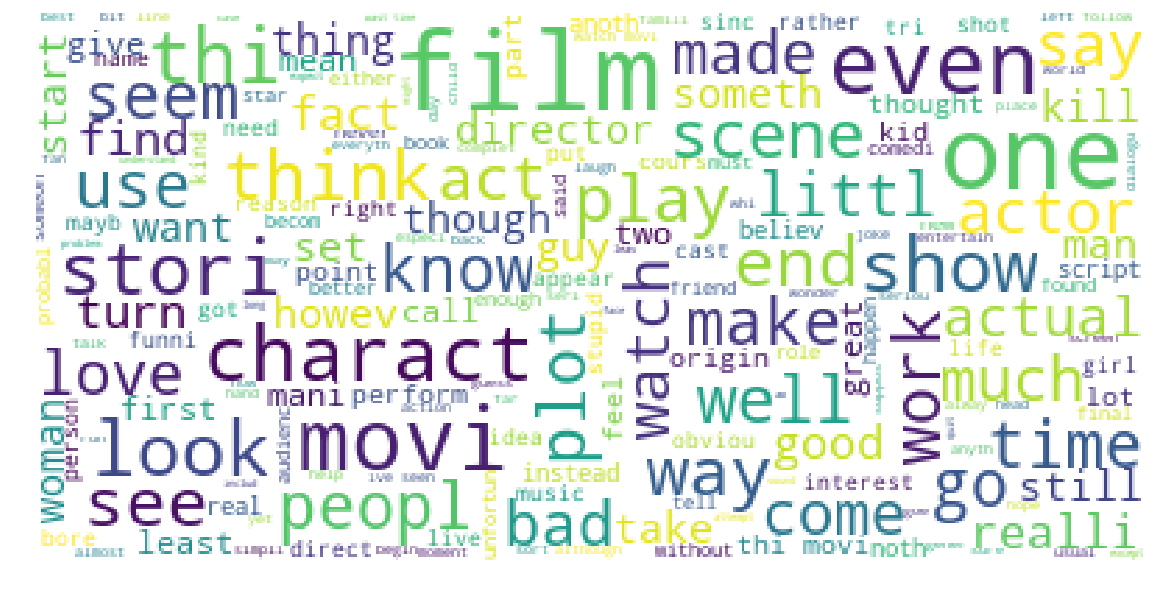

In [34]:
#####WordCloud Negative Train & Test set######
df_freq = pd.concat([train_df, test_df], ignore_index = True)
wc_neglist=df_freq["review"][df_freq.label.isin(['0'])].unique().tolist()

#wc_neglist=train_df.loc[train_df['label'] == 0, 'review']
Wc_neg =''.join(wc_neglist)
wordcloud_neg = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(Wc_neg)
    
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.show()

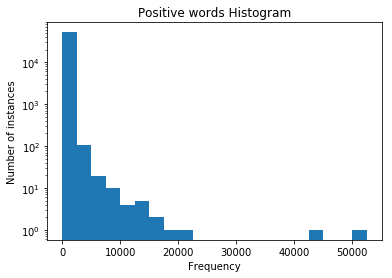

In [35]:
######Visualising the histogram for positive reviews  from train and test dataset
hist_pos = cvector.fit_transform(df_freq[df_freq.label.isin(['1'])].review)

# Visualising the histogram for positive reviews only from train and dataset
data = hist_pos.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data[0], bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Positive words Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()

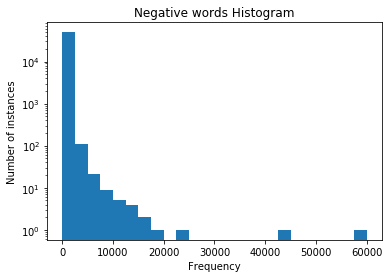

In [36]:
# Visualising the histogram for negative reviews  from train and test dataset
hist_neg = cvector.fit_transform(df_freq[df_freq.label.isin(['0'])].review)
data = hist_neg.sum(axis=0).tolist()
binwidth = 2500
plt.hist(data[0], bins=range(min(data[0]), max(data[0]) + binwidth, binwidth), log=True)
plt.title("Negative words Histogram")
plt.xlabel("Frequency")
plt.ylabel("Number of instances")
plt.show()
##########

In [6]:
###Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
import operator



def get_feature(df, number):
    
    feature_list = []
    # create an instance for tree feature selection
    tree_clf = ExtraTreesClassifier()

    # first create arrays holding input and output data

    # Vectorizing Train set
    cv = CountVectorizer(analyzer='word')
    x_train = cv.fit_transform(df['review'])
   
    # Creating an object for Label Encoder and fitting on target strings
    le = LabelEncoder()
    y = le.fit_transform(df['label'])

    # fit the model
    tree_clf.fit(x_train, y)
    
    # Preparing variables
    importances = tree_clf.feature_importances_
    
    feature_names = cv.get_feature_names()
    feature_imp_dict = dict(zip(feature_names, importances))
    
    sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)
    indices = np.argsort(importances)[::-1]
    
    # Create the feature list
    for f in range(number):
        feature_list.append(sorted_features[f][0])
    
    return(feature_list)

In [39]:
#####Visualisation after feature selection#####

df_freq = pd.concat([train_df, test_df], ignore_index = True)

word_list = get_feature(df_freq, 1000)

# Removing non prefered words from training and test combined data
count = 0
for sentence in df_freq['review']:
    sentence = [word for word in sentence.lower().split() if word in word_list]
    sentence = ' '.join(sentence)
    df_freq.loc[count, 'review'] = sentence
    count+=1
 

C:\Users\star\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


C:\Users\star\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


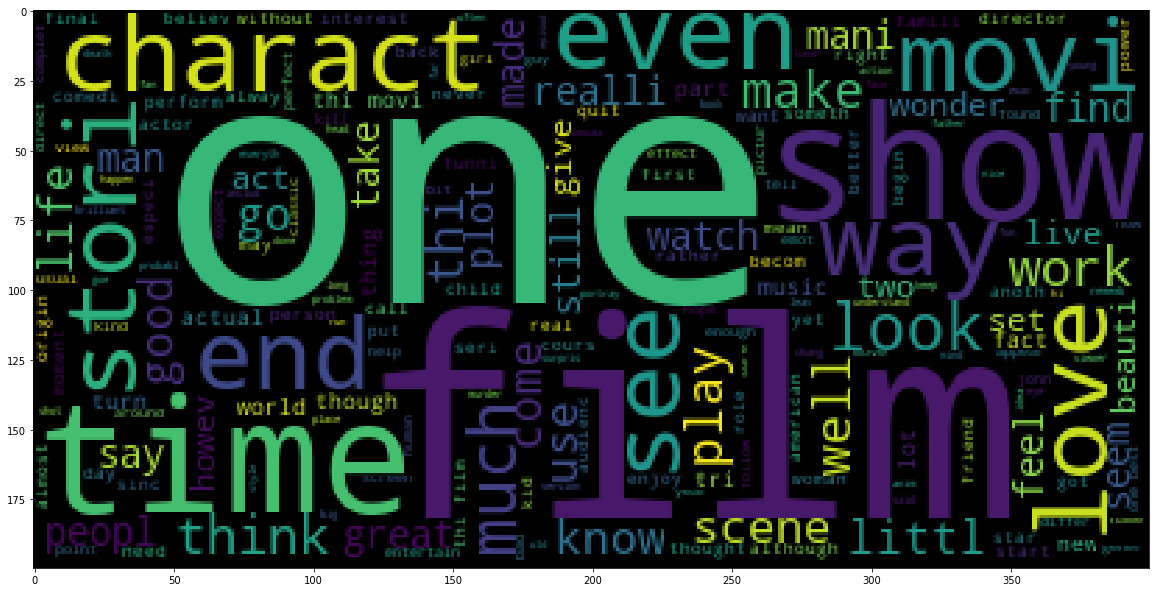

In [38]:
   
########################## WordCloud Positive Train & Test set post feature selection ##################################

# Creating a list of train and test data to analyse
imdb_list = df_freq["review"][df_freq.label.isin(['1'])].unique().tolist()

imdb_bow = " ".join(imdb_list)
# Create a word cloud for psitive words
imdb_wordcloud = WordCloud().generate(imdb_bow)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.show()    

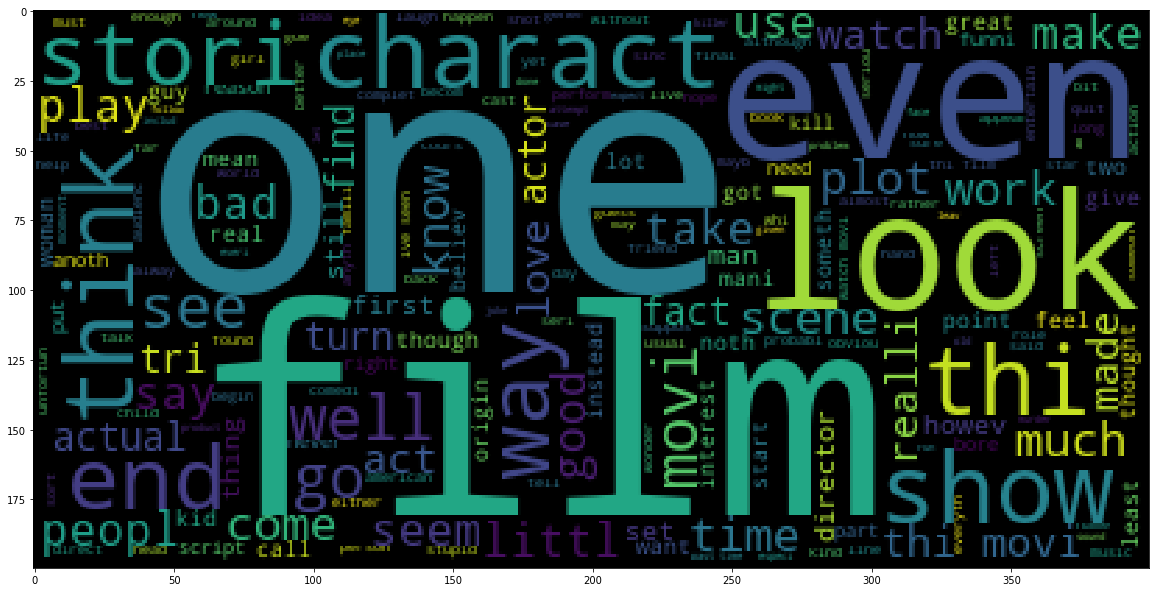

In [42]:
########################## WordCloud Negative Train & Test set post feature selection ##################################

# Creating a list of ham data only to analyse
imdb_list = df_freq["review"][df_freq.label.isin(['0'])].unique().tolist()
imdb_bow = " ".join(imdb_list)

# Create a word cloud for ham
imdb_wordcloud = WordCloud().generate(imdb_bow)

# Show the created image of word cloud
plt.figure(figsize=(20, 20))
plt.imshow(imdb_wordcloud)
plt.show()

In [11]:
###############Hypothesis Testing#################

# Creating df_algo dataframe which will be used for hypothesis testing
df_algo = pd.concat([train_df, test_df], keys=['train', 'test'])
df_algo = df_algo.reset_index(col_level=1).drop(['level_1'], axis=1)
df_algo['review'] = df_algo['review'].str.split()
df_algo['review']=df_algo['review'].apply(lambda x: [word for word in x if word not in stop_words])
df_algo['review'] = df_algo['review'].map(stripTags)
df_algo['review'] = df_algo['review'].apply(remove_punctuation)
df_algo['review']=df_algo['review'].apply(lambda x:" ".join([stemmer.stem(word) for word in x.split()]))
df_algo['review']=df_algo['review'].apply(lambda x:" ".join([lem.lemmatize(word) for word in x.split()]))


0         stori man unnatur feel pig start open scene t...
1         airport start brand new luxuri plane load val...
2         thi film lack someth I put finger first chari...
3         sorri everyon I know suppos art film wow hand...
4         I littl parent took along theater see interio...
5         It appear mani critic find idea woodi allen d...
6         second attempt new york intellectu le year ma...
7         I know blame timid writer clueless director I...
8         thi film mediocr best angi harmon funni bag h...
9         film bad way say stori weak outdat especi cou...
10        thi film one giant pant load paul schrader ut...
11        plot descent actual call plot two noteworthi ...
12        plot worth discus even hint corrupt murder po...
13        thi film male escort get involv murder invest...
14        thi movi must line bore movi year even woodi ...
15        A worn plot man take rap woman murder case eq...
16        I saw movi drive howard duck I consid worst m.

In [8]:
################################### Removing non feature words ###############################
# Creating the feature word_list
# Selecting 14440 feature selected words based on 80-20 rule
word_list = get_feature(df_algo[['review', 'label']], 14440)

# Removing non prefered words from training and test combined data
count = 0
for sentence in df_algo['review']:
    sentence = [word for word in sentence.lower().split() if word in word_list]
    sentence = ' '.join(sentence)
    df_algo.loc[count, 'review'] = sentence
    count+=1

################################## Splitting with feature selection data ###############################a

# Vectorising the required data
from sklearn.feature_extraction.text import TfidfVectorizer
vect_algo = TfidfVectorizer(stop_words='english', analyzer='word')
vect_algo.fit(df_algo.review)
Xf_train = vect_algo.transform(df_algo[df_algo['level_0'].isin(['train'])].review)
Xf_test = vect_algo.transform(df_algo[df_algo['level_0'].isin(['test'])].review)

# Encoding target data
# Creating an object and fitting on target strings
le = LabelEncoder()
yf_train = le.fit_transform(df_algo[df_algo['level_0'].isin(['train'])].label)
yf_test = le.fit_transform(df_algo[df_algo['level_0'].isin(['test'])].label)

C:\Users\star\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
########################################### Naive Bayes-Supervised learning #########################################
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# Fit the Naive Bayes classifier model to the object
clf = MultinomialNB()
clf.fit(Xf_train, yf_train)

# predict the outcome for testing data
predictions = clf.predict(Xf_test)
print(predictions)
# check the accuracy of the model
accuracy = accuracy_score(yf_test, predictions)
print("Observation: Naive Bayes Classification gives an accuracy of %.2f%% on the testing data" %(accuracy*100))

[0 0 0 ... 1 1 1]
Observation: Naive Bayes Classification gives an accuracy of 82.59% on the testing data


In [12]:
#####################Unsupervised Learning#######################
path="D:/DS/aclImdb_v1/aclImdb/train/unsup"
data4=[]
files=[path+'/'+ f for f in os.listdir(path) if os.path.isfile(path+'/'+ f)]
for f in files:
    with open (f,"r",encoding="utf8")as myfile:
        data4.append(myfile.read())
df_unsup=pd.DataFrame(data4,columns=['review'])  
#df_unsup= pd.read_csv('../input/unsupr/df_unsup.csv',encoding = "ISO-8859-1")
stop_words = set(stopwords.words('english')) 
df_unsup['review'] = df_unsup['review'].str.split()
df_unsup['review']=df_unsup['review'].apply(lambda x: [word for word in x if word not in stop_words])


0        [I, admit,, great, majority, films, released, ...
1        [Take, low, budget,, inexperienced, actors, do...
2        [Everybody, seen, 'Back, To, The, Future,', ri...
3        [Doris, Day, icon, beauty, singing, acting, wa...
4        [After, series, silly,, fun-loving, movies,, 1...
5        [This, exactly, musical,, almost, seems, like,...
6        [After, seven, years, seventeen, pictures, War...
7        [In, 1950's, many, film, boigraphies:, For, 4,...
8        [MY, RATING-, 7.3<br, /><br, />This, one, curi...
9        [Doris, Day, James, Cagney, excellent, lush, T...
10       [LOVE, ME, OR, LEAVE, ME, typical, musical., T...
11       [I, say, name, like, Zombiegeddon, atom, bomb,...
12       [This, film, story, 20's, singer, Ruth, Etting...
13       [I've, rarely, impressed, Cinerama, style, fil...
14       [Some, films,, critical, praise, receive,, sim...
15       [What, I, say, movie, already, said,, 'bout, b...
16       [James, Cagney, always, delight, watch,, even,.

In [13]:
df_unsup['review'] = df_unsup['review'].map(stripTags)
df_unsup['review'] = df_unsup['review'].apply(remove_punctuation)


0         I admit great majority films released say me ...
1         Take low budget inexperienced actors doubling...
2         Everybody seen Back To The Future right Wheth...
3         Doris Day icon beauty singing acting warm voi...
4         After series silly fun loving movies big year...
5         This exactly musical almost seems like one si...
6         After seven years seventeen pictures Warner B...
7         In s many film boigraphies For memorable Inte...
8         MY RATING This one curious mov made James Cag...
9         Doris Day James Cagney excellent lush Technic...
10        LOVE ME OR LEAVE ME typical musical That is o...
11        I say name like Zombiegeddon atom bomb front ...
12        This film story s singer Ruth Etting marriage...
13        Ive rarely impressed Cinerama style film maki...
14        Some films critical praise receive simply pas...
15        What I say movie already said bout background...
16        James Cagney always delight watch even hes pl.

In [14]:
df_unsup['review']=df_unsup['review'].apply(lambda x:" ".join([stemmer.stem(word) for word in x.split()]))
df_unsup['review']=df_unsup['review'].apply(lambda x:" ".join([lem.lemmatize(word) for word in x.split()]))
from sklearn.feature_extraction.text import CountVectorizer
# Vectorizing unlabelled reviews set
vect = CountVectorizer(stop_words = 'english', analyzer='word')
vect_pos = vect.fit_transform(df_unsup.review)

# Creating a dataframe for the high frequency words for unlabelled reviews set
df_freq = pd.DataFrame(vect_pos.sum(axis=0), columns=list(vect.get_feature_names()), index = ['frequency']).T

# Removing high frequency and low frequency data for more accuracy
word_list = df_freq.nlargest(100, 'frequency').index
word_list = word_list.append(df_freq.nsmallest(43750, 'frequency').index)

# Removing unwanted words based on word_list from unlabelled data
count = 0
for sentence in df_unsup['review']:
    sentence = [word for word in sentence.lower().split() if word not in word_list]
    sentence = ' '.join(sentence)
    df_unsup.loc[count, 'review'] = sentence
    count+=1

In [15]:
##################################### Using K-means to create two clusters ##################################### 
from sklearn.cluster import KMeans
# Vectorizing dataset
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_unsup.review)
 
# Creating a k-means object and fitting it to target variable
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
 
# Visualising the 2 clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

# Prediction for test set using Kmeans clusters
Y = vectorizer.transform(test_df.review)
prediction = model.predict(Y)

# Actual results of test sets for comparison
le = LabelEncoder()
y = le.fit_transform(test_df.label)

# check the accuracy of the model
accuracy = accuracy_score(y, prediction)
if accuracy < 0.5:
    accuracy = 1 - accuracy
print("Observation: The unsupervised learning gives an accuracy of %.2f%% on the testing data" %(accuracy*100))    

Top terms per cluster:
Cluster 0:
 worst
 wast
 bore
 laugh
 terribl
 stupid
 aw
 budget
 horribl
 money
Cluster 1:
 beauti
 famili
 alway
 excel
 war
 child
 american
 differ
 saw
 entertain
Observation: The unsupervised learning gives an accuracy of 72.49% on the testing data


In [16]:
##################################### Using K-means to create clusters ##################################### 

# Vectorizing dataset
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_unsup.review)
 
# Creating a k-means object and fitting it to target variable
true_k = 9
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1, random_state=13)
model.fit(X)
 
# Visualising the clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 episod
 kid
 season
 laugh
 tv
 child
 famili
 rememb
 saw
 adult
Cluster 1:
 budget
 low
 zombi
 sci
 fi
 alien
 monster
 special
 flick
 dead
Cluster 2:
 killer
 murder
 gore
 hous
 death
 slasher
 scari
 thriller
 dead
 blood
Cluster 3:
 game
 graphic
 video
 fun
 fantasi
 level
 final
 gameplay
 player
 ff
Cluster 4:
 anim
 cartoon
 disney
 bambi
 voic
 child
 kid
 batman
 short
 episod
Cluster 5:
 worst
 wast
 terribl
 bore
 aw
 money
 horribl
 stupid
 rent
 dont
Cluster 6:
 fun
 saw
 laugh
 dvd
 john
 excel
 entertain
 alway
 worth
 beauti
Cluster 7:
 war
 famili
 american
 child
 beauti
 human
 emot
 differ
 audienc
 documentari
Cluster 8:
 book
 read
 novel
 adapt
 version
 chang
 base
 disappoint
 complet
 miss


From above we get the following genres:-
Cluster 0 -  Television Series
Cluster 1 - Action, Thriller, Mystery,Science fiction
Cluster 2 - Horror, Thriller
Cluster 3 - Action,Fiction,Animation
Cluster 4 - Cartoon, Animation, Disney
Cluster 5 - Reality, DraaFlop
Cluster 6 - Comedy, Romance, Romantic Comedy
Cluster 7 - War, Political, History
Cluster 8 - Children, Adaptation

In [17]:
#####Supervised Learning:Other Models        
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Fit the LogiticRegression classifier model to the object
lr = LogisticRegression()
lr.fit(Xf_train, yf_train)

# predict the outcome for testing data
predictions = lr.predict(Xf_test)
print(predictions)
# check the accuracy of the model
accuracy = accuracy_score(yf_test, predictions)
print("Observation: LogisticRegression Classification gives an accuracy of %.2f%% on the testing data" %(accuracy*100))
        
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
# Fit the LogiticRegression classifier model to the object
sgd =SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(Xf_train, yf_train)

# predict the outcome for testing data
predictions = sgd.predict(Xf_test)
print(predictions)
# check the accuracy of the model
accuracy = accuracy_score(yf_test, predictions)
print("Observation: SGDClassifier Classification gives an accuracy of %.2f%% on the testing data" %(accuracy*100))
###########################################################

C:\Users\star\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 0 0 ... 1 1 1]
Observation: LogisticRegression Classification gives an accuracy of 87.55% on the testing data


C:\Users\star\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


[0 0 0 ... 1 1 1]
Observation: SGDClassifier Classification gives an accuracy of 86.70% on the testing data
